# Spotify Analysis: Study of song factors and the positive correlation to streaming

## Members
- Joey Beightol
- Ryan Lucero
- Matthew Parker

## Objective:


## Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load in Data

In [45]:
# Load data from a CSV file into a DataFrame
spotifyDF = pd.read_csv('spotify-2023.csv', encoding='latin-1')

# Display the first few rows of the DataFrame
display(spotifyDF.head())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [46]:
#Removing any types that are not a number in streams column
spotifyDF['streams'] = pd.to_numeric(spotifyDF['streams'], errors='coerce')
spotifyDF = spotifyDF.dropna(subset=['streams'])
spotifyDF= spotifyDF.reset_index(drop=True)


### Take look at data

In [47]:
#describe the dataframe
spotifyDF.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [48]:
#Fina all null values
spotifyDF.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [49]:
#Duplication
spotifyDF.duplicated().sum()

0

## Visualizing Data

### Artist Streams

In [50]:
#artist streams
artistStreams = pd.pivot_table(spotifyDF, values='streams', index='artist(s)_name', aggfunc='sum')
display(artistStreams.sort_values(by='streams',ascending=False).head())


,streams
artist(s)_name,
The Weeknd,1.418555e+10
Taylor Swift,1.405366e+10
Ed Sheeran,1.390895e+10
Harry Styles,1.160865e+10
Bad Bunny,9.997800e+09


### Month Realeased Streams

Total Streams


,streams
released_month,
1,9.675832e+10
5,5.320564e+10
11,4.420738e+10
10,4.298988e+10
9,4.114008e+10


Average Streams


,streams
released_month,
9,7.346444e+08
1,7.275061e+08
8,6.312657e+08
10,5.889024e+08
11,5.525923e+08


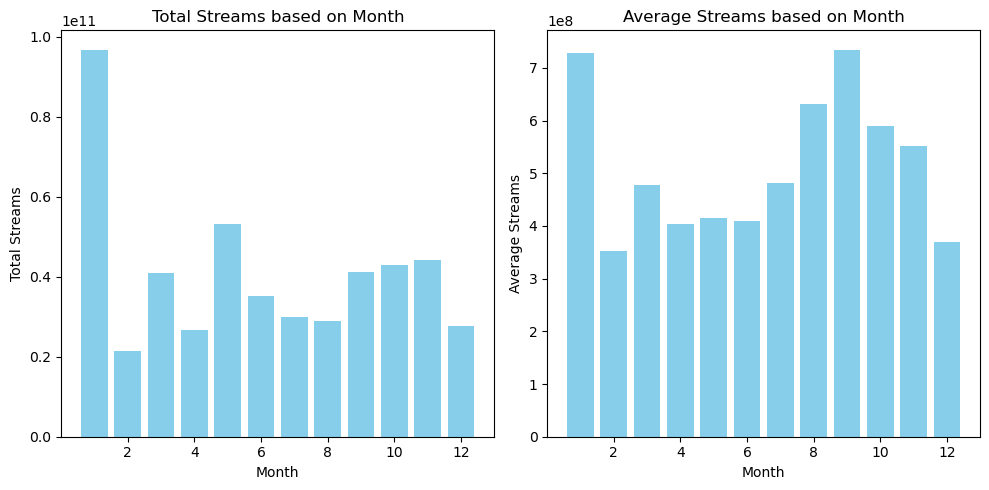

In [102]:
#Total streams based on danceability
monthlyStreams = pd.pivot_table(spotifyDF, values='streams', index='released_month', aggfunc='sum')
print('Total Streams')
display(monthlyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
monthlyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='released_month', aggfunc='mean')
print('Average Streams')
display(monthlyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Month
axs[0].bar(monthlyStreams.index, monthlyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Month')
#Average streams vs. Month
axs[1].bar(monthlyStreamAvg.index, monthlyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Month')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### BPM and Streams

Total Streams


,streams
bpm,
120,1.789501e+10
110,1.389453e+10
95,1.368051e+10
124,1.202015e+10
92,1.173570e+10


Average Streams


,streams
bpm,
171,2.409867e+09
179,1.735442e+09
186,1.718833e+09
181,1.256881e+09
111,1.230280e+09


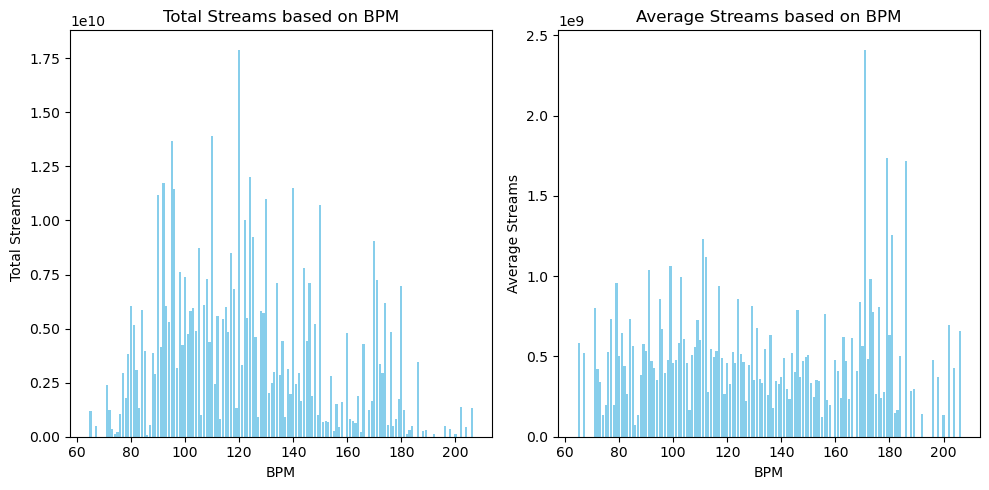

In [103]:
#Total streams based on BPM
bpmStreams = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='sum')
print('Total Streams')
display(bpmStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on BPM
bpmStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='mean')
print('Average Streams')
display(bpmStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. BPM
axs[0].bar(bpmStreams.index, bpmStreams['streams'], color='skyblue')
axs[0].set_xlabel('BPM')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on BPM')
#Average streams vs. BPM
axs[1].bar(bpmStreamAvg.index, bpmStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('BPM')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on BPM')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Key and Streams

Total Streams


,streams
key,
C#,7.251363e+10
G,4.344954e+10
G#,4.339898e+10
D,4.289157e+10
B,4.206718e+10


Average Streams


,streams
key,
C#,6.042802e+08
E,5.774972e+08
D#,5.530365e+08
A#,5.524754e+08
D,5.295256e+08


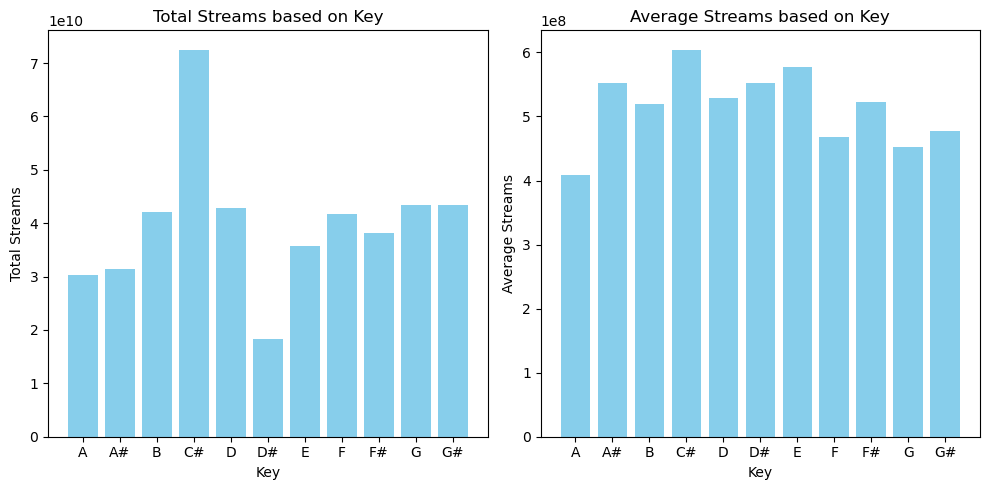

In [89]:
#Total streams based on Key
keyStreams = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='sum')
print('Total Streams')
display(keyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Key
keyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='mean')
print('Average Streams')
display(keyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Key
axs[0].bar(keyStreams.index, keyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Key')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Key')
#Average streams vs. Key
axs[1].bar(keyStreamAvg.index, keyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Key')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Key')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



### Danceability Vs. Streams

Total Streams


,streams
danceability_%,
70,2.133062e+10
61,1.844879e+10
77,1.658312e+10
59,1.573039e+10
74,1.536490e+10


Average Streams


,streams
danceability_%,
35,1.258126e+09
29,1.230856e+09
55,1.003559e+09
32,9.952062e+08
45,9.749488e+08


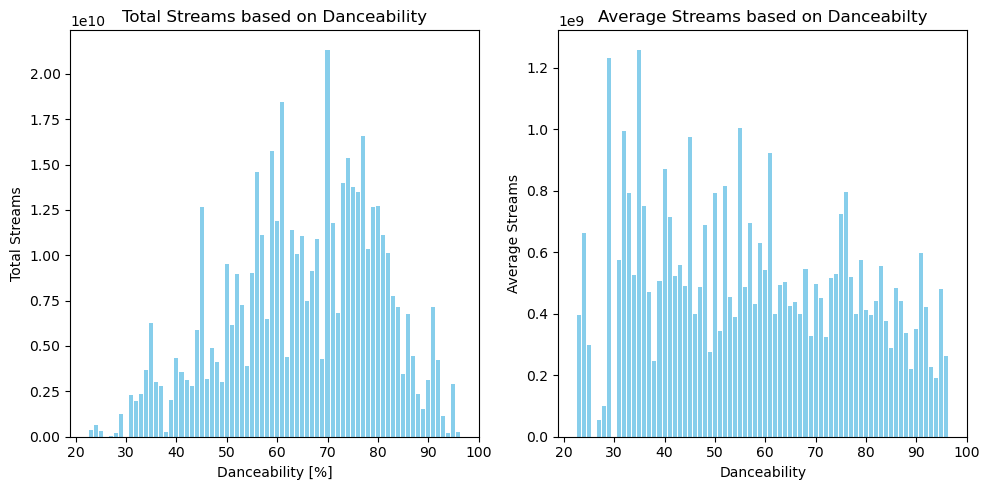

In [88]:
#Total streams based on danceability
danceStreams = pd.pivot_table(spotifyDF, values='streams', index='danceability_%', aggfunc='sum')
print('Total Streams')
display(danceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
danceStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='danceability_%', aggfunc='mean')
print('Average Streams')
display(danceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. danceability
axs[0].bar(danceStreams.index, danceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Danceability [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Danceability')
#Average streams vs. danceability
axs[1].bar(danceStreamAvg.index, danceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Danceability [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Danceabilty')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams based on Valence %

Total Streams


,streams
valence_%,
53,1.335094e+10
24,1.301216e+10
59,1.242249e+10
40,1.029115e+10
42,1.017591e+10


Average Streams


,streams
valence_%,
12,1.239393e+09
93,1.141778e+09
95,1.113839e+09
38,1.005746e+09
6,9.772233e+08


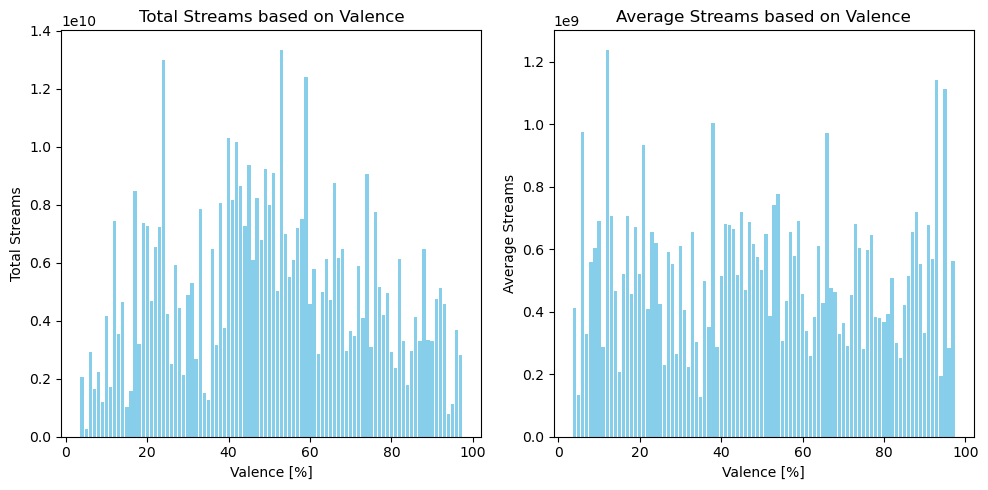

In [99]:
#Total streams based on Valence
valenceStreams = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='sum')
print('Total Streams')
display(valenceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Valence
valenceStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='mean')
print('Average Streams')
display(valenceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Valence
axs[0].bar(valenceStreams.index, valenceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Valence [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Valence')
#Average streams vs. Valence
axs[1].bar(valenceStreamAvg.index, valenceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Valence [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Valence')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams based on Energy

Total Streams


,streams
energy_%,
52,1.631815e+10
66,1.624626e+10
80,1.542621e+10
73,1.363552e+10
65,1.321418e+10


Average Streams


,streams
energy_%,
93,1.305763e+09
27,1.102825e+09
26,1.098487e+09
52,9.065641e+08
38,8.869762e+08


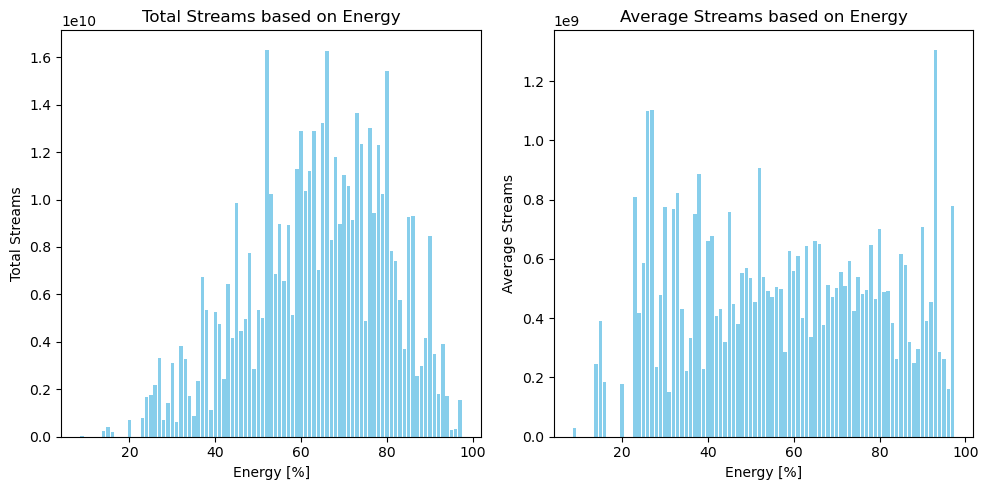

In [105]:
#Total streams based on Energy
energyStreams = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='sum')
print('Total Streams')
display(energyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Energy
energyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='mean')
print('Average Streams')
display(energyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Energy
axs[0].bar(energyStreams.index, energyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Energy [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Energy')
#Average streams vs. Energy
axs[1].bar(energyStreamAvg.index, energyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Energy [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Energy')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams Based on Accousticness

Total Streams


,streams
acousticness_%,
0,3.525733e+10
1,3.004232e+10
4,2.208287e+10
2,2.119280e+10
9,1.924348e+10


Average Streams


,streams
acousticness_%,
58,1.662174e+09
63,1.521946e+09
54,1.431395e+09
93,1.240064e+09
68,1.230856e+09


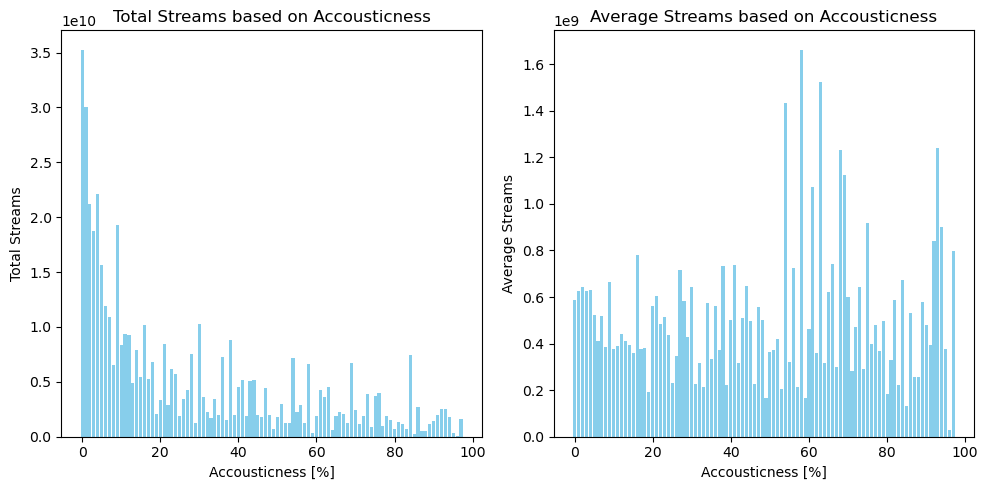

In [107]:
#Total streams based on Accousticness
accStreams = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='sum')
print('Total Streams')
display(accStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Accousticness
accStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='mean')
print('Average Streams')
display(accStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Accousticness
axs[0].bar(accStreams.index, accStreams['streams'], color='skyblue')
axs[0].set_xlabel('Accousticness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Accousticness')
#Average streams vs. Accousticness
axs[1].bar(accStreamAvg.index, accStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Accousticness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Accousticness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Streams based on liveness

Total Streams


,streams
liveness_%,
9,5.752475e+10
11,4.736157e+10
10,4.472486e+10
12,2.988619e+10
8,2.791170e+10


Average Streams


,streams
liveness_%,
64,1.385757e+09
42,9.638291e+08
46,8.710787e+08
50,8.437020e+08
45,7.814507e+08


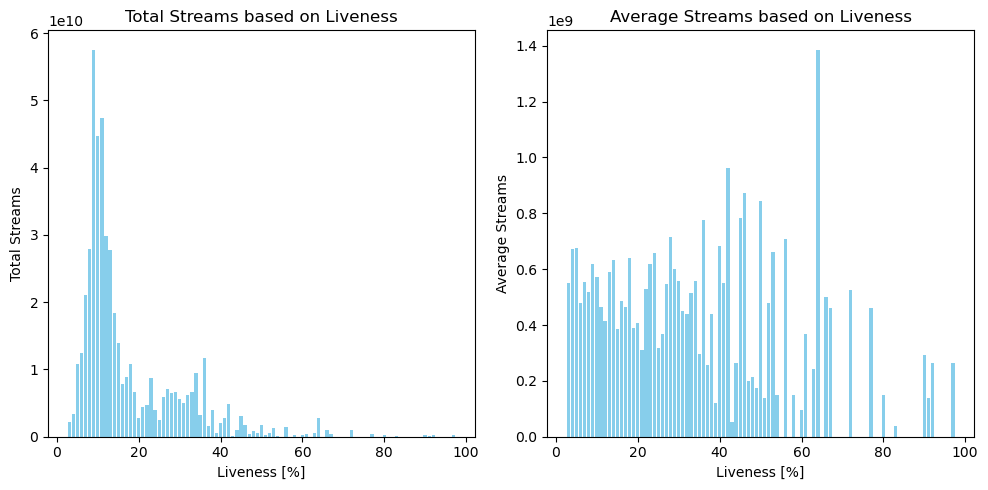

In [108]:
#Total streams based on liveness
livenessStreams = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='sum')
print('Total Streams')
display(livenessStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on liveness
livenessStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='mean')
print('Average Streams')
display(livenessStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. liveness
axs[0].bar(livenessStreams.index, livenessStreams['streams'], color='skyblue')
axs[0].set_xlabel('Liveness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Liveness')
#Average streams vs. liveness
axs[1].bar(livenessStreamAvg.index, livenessStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Liveness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Liveness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Streams based on Speachiness

Total Streams


,streams
speechiness_%,
3,9.269137e+10
4,8.691274e+10
5,7.503727e+10
6,3.727406e+10
8,2.815813e+10


Average Streams


,streams
speechiness_%,
2,1.468183e+09
44,1.155506e+09
18,8.654915e+08
37,7.983765e+08
28,7.914525e+08


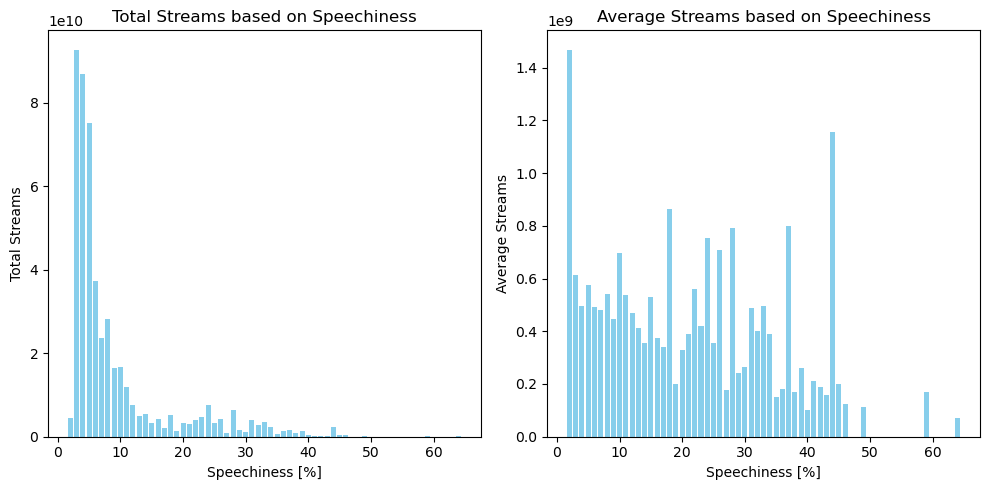

In [110]:
#Total streams based on speechiness
speechStreams = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='sum')
print('Total Streams')
display(speechStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on speechiness
speechStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='mean')
print('Average Streams')
display(speechStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. speechiness
axs[0].bar(speechStreams.index, speechStreams['streams'], color='skyblue')
axs[0].set_xlabel('Speechiness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Speechiness')
#Average streams vs. speechiness
axs[1].bar(speechStreamAvg.index, speechStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Speechiness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Speechiness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Clean the data

### Analysis of data: Correlation